In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/scripts/')
import HSCMeasurementUtils as hmu
import sacc
import healsparse
import healpy as hp

## Footprint / Mask

>> Saving figure ...
/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering/mask/mask.pdf


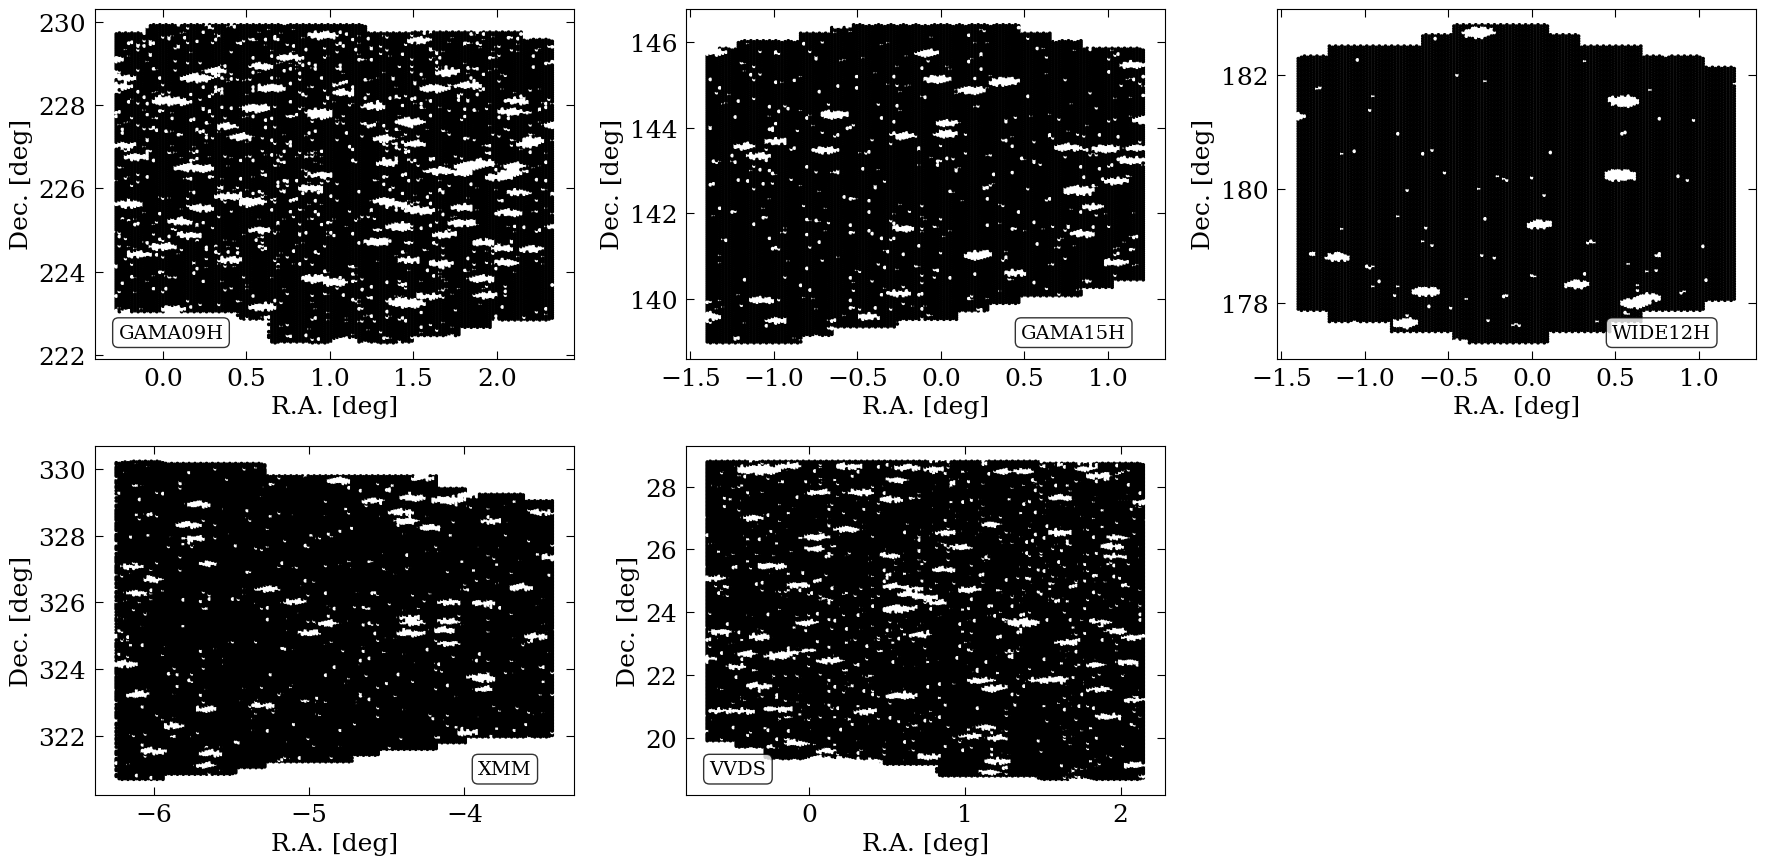

In [5]:
path = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/lens_sample_2023_pdr1'
path_aux = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/mask/star_snr10_imag245'
savepath = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering/mask'

mask_type = 'star_snr10_imag245'
nside = 2048

# HSC Fields
label_list = ['gama09h', 'gama15h', 'wide12h', 'xmm', 'vvds']

# Initialize an empty matplotlib figure with 2 rows and 3 columns in the top tow and 2 columns in the bottom row
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

# Increase the horizontal separation between the plots
fig.subplots_adjust(hspace = 0.3, wspace=0.3)

# Iterate over fields
for label in label_list:
    if label == 'gama09h':
        # Plot position
        pind = (0,0)
        # Text position
        x,y = (0.05, 0.1)
    elif label == 'gama15h':
        pind = (0,1)
        x,y = (0.7, 0.1)
    elif label == 'wide12h':
        pind = (0,2)
        x,y = (0.7, 0.1)
    elif label == 'xmm':
        pind = (1,0)
        x,y = (0.8, 0.1)
    elif label == 'vvds':
        pind = (1,1)
        x,y = (0.05, 0.1)
    # Compose the filename
    fname = os.path.join(path_aux, f'mask_{mask_type}_nside{nside}_{label}.hs')
    # Read the mask
    mask = healsparse.HealSparseMap.read(fname)
    # Get the pixels
    pixels = mask.valid_pixels
    # Get the mask values
    mask_values = mask[pixels]
    # Convert pixels to ring ordering
    pixels = hp.nest2ring(nside, pixels)
    # Convert pixel to ra and dec using the HSCMeasurementUtils
    ra, dec = HSCMeasurementUtils.IndexToDeclRa(index = pixels,nside=nside)

    # Plot ra and dec with a scatter plot and using mask_values in black and white
    axs[pind].scatter(ra, dec, c=mask_values, s=3, cmap='binary')
    # Xlabel
    axs[pind].set_xlabel('R.A. [deg]')
    axs[pind].set_ylabel('Dec. [deg]')
    # Write the name of the field, which is the label, in capital letters inside the plot
    # as text and not overlapping with the scatter plot 
    axs[pind].text(x, y, label.upper(), transform=axs[pind].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove the last plot
fig.delaxes(axs[1,2])
# Center the plots
fig.tight_layout()

print(">> Saving figure ...")
print(os.path.join(savepath, 'mask.pdf'))

plt.savefig(os.path.join(savepath, 'mask.png'),
             dpi=300,
             bbox_inches='tight')
plt.savefig(os.path.join(savepath, 'mask.pdf'),
             dpi=300,
             bbox_inches='tight')


## Photometric redshift distribution

In [2]:
fname = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/combined/summary_statistics_fourier_ivw.sacc'
s = sacc.Sacc.load_fits(fname)

In [3]:
savepath = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/redshift-distribution'

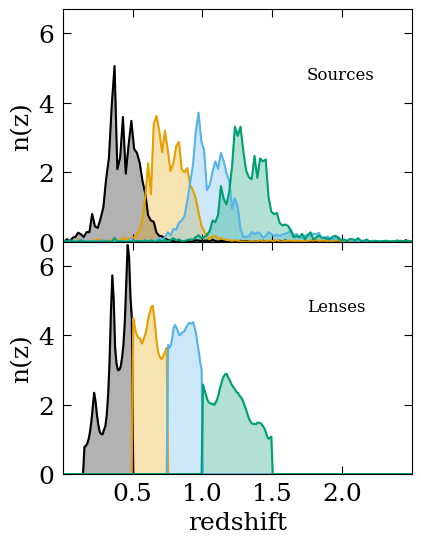

()

In [4]:
HSCMeasurementUtils.RedshiftDistr_plot(sacc = s,
                                       savepath = savepath)

## Angular power spectra

### Cosmic shear cross-checks

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


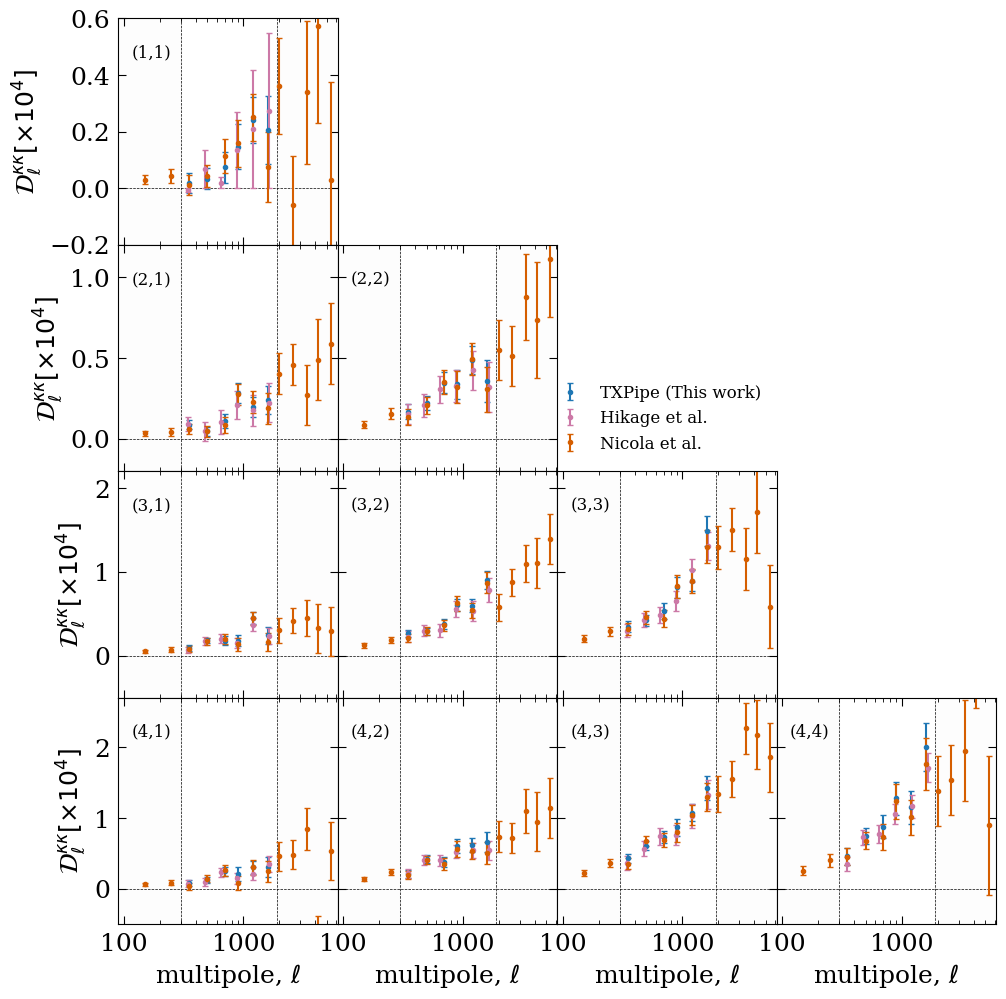

()

In [2]:
HSCMeasurementUtils.Shear2pt_plot(fname = ['/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/ivw/summary_statistics_fourier_ivw_HikageShearSC.sacc'],
                                  labels = ['TXPipe (This work)'],
                                  add_individual = True,
                                  add_combined = False,
                                  add_literature=True,
                                  add_Hikage_sacc=False,
                                  theory_fname=None,
                                  just_auto = False,
                                  save_fig=False)

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.


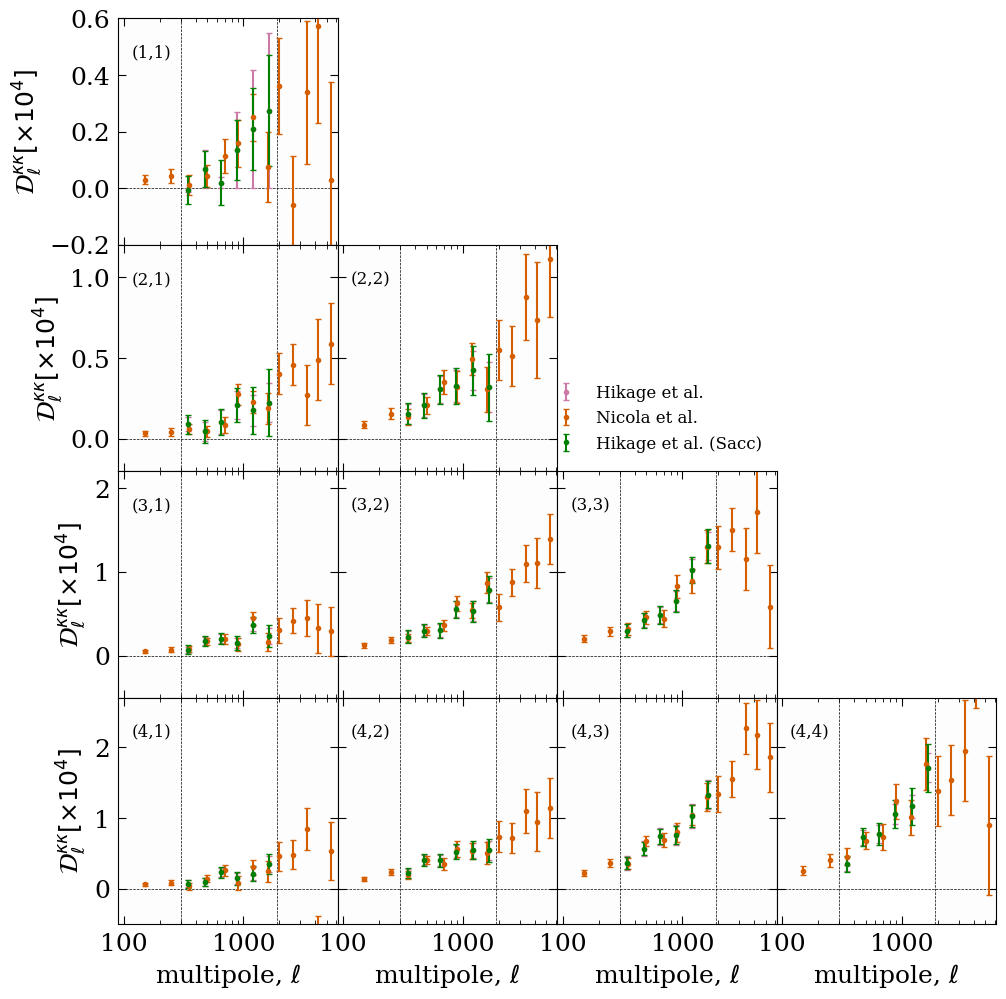

()

In [2]:
HSCMeasurementUtils.Shear2pt_plot(fname = ['/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/cls_hscpdr1_hikage_wcov_cholesky.sacc'],
                                  labels = ['Hikage et al. signal in Sacc'],
                                  add_individual = False,
                                  add_combined = False,
                                  add_literature=True,
                                  add_Hikage_sacc=True,
                                  theory_fname=None,
                                  just_auto = False,
                                  save_fig=False)

<< Chisq calculation >>
Data: (0, 0)
Data: (1, 0)
Data: (1, 1)
Data: (2, 0)
Data: (2, 1)
Data: (2, 2)
Data: (3, 0)
Data: (3, 1)
Data: (3, 2)
Data: (3, 3)
Theory: (0, 0)
Theory: (1, 0)
Theory: (1, 1)
Theory: (2, 0)
Theory: (2, 1)
Theory: (2, 2)
Theory: (3, 0)
Theory: (3, 1)
Theory: (3, 2)
Theory: (3, 3)
Chisq = 67.29
Chisq / ndof = 1.4


/opt/desc/py/lib/python3.10/site-packages/sacc/sacc.py:376: UserWarning: Empty index selected
  warnings.warn("Empty index selected")


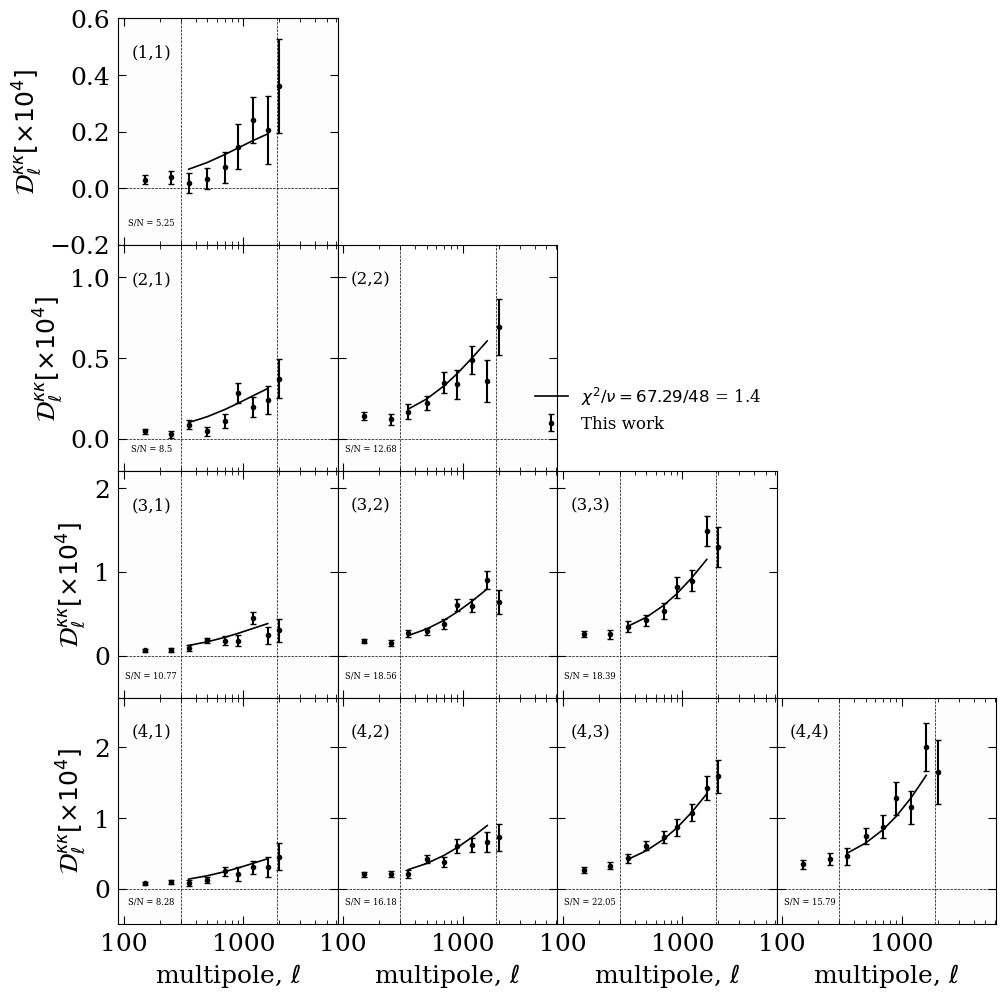

()

In [3]:
HSCMeasurementUtils.Shear2pt_plot(fname = [None],
                                  labels = [None],
                                  add_individual = False,
                                  add_combined = 'ivw',
                                  add_literature=False,
                                  add_Hikage_sacc=False,
                                  theory_fname='/pscratch/sd/d/davidsan/new_firecrown/firecrown/examples/hsc_3x2pt/cosmicshear/output/cosmicshear_multinest_txpipe_with_systematics_30102023/test/data_vector',
                                  just_auto = False,
                                  save_fig=False)

### Cosmic shear

>>  Cosmic shear - Hikage et al.
>>  Cosmic shear - Nicola et al.
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/cosmicshear
Shear2pt_Literature_CombinedIVW


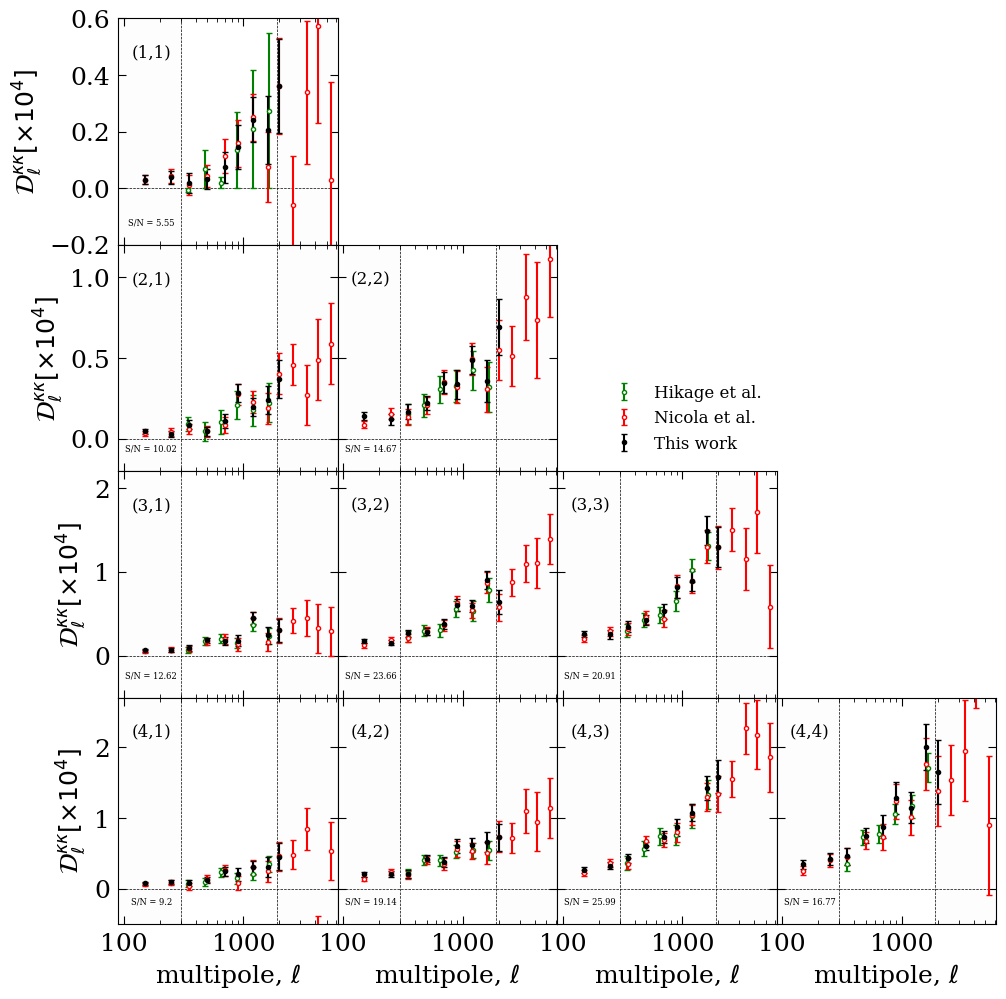

()

In [3]:
hmu.Shear2pt_plot(fname = [None],
                  labels = [None],
                  add_individual = False,
                  add_combined = 'ivw',
                  add_allfields=False,
                  add_literature=True,
                  add_Hikage_sacc=False,
                  theory_fname=None,
                  just_auto = False,
                  save_fig=True)

Comparison of our TXPipe measurements: signal obtained from the measurement on the 5 different patches at the same time versus the combined measurement of the patches individually and then combined via inverse variance weighting.

>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measur

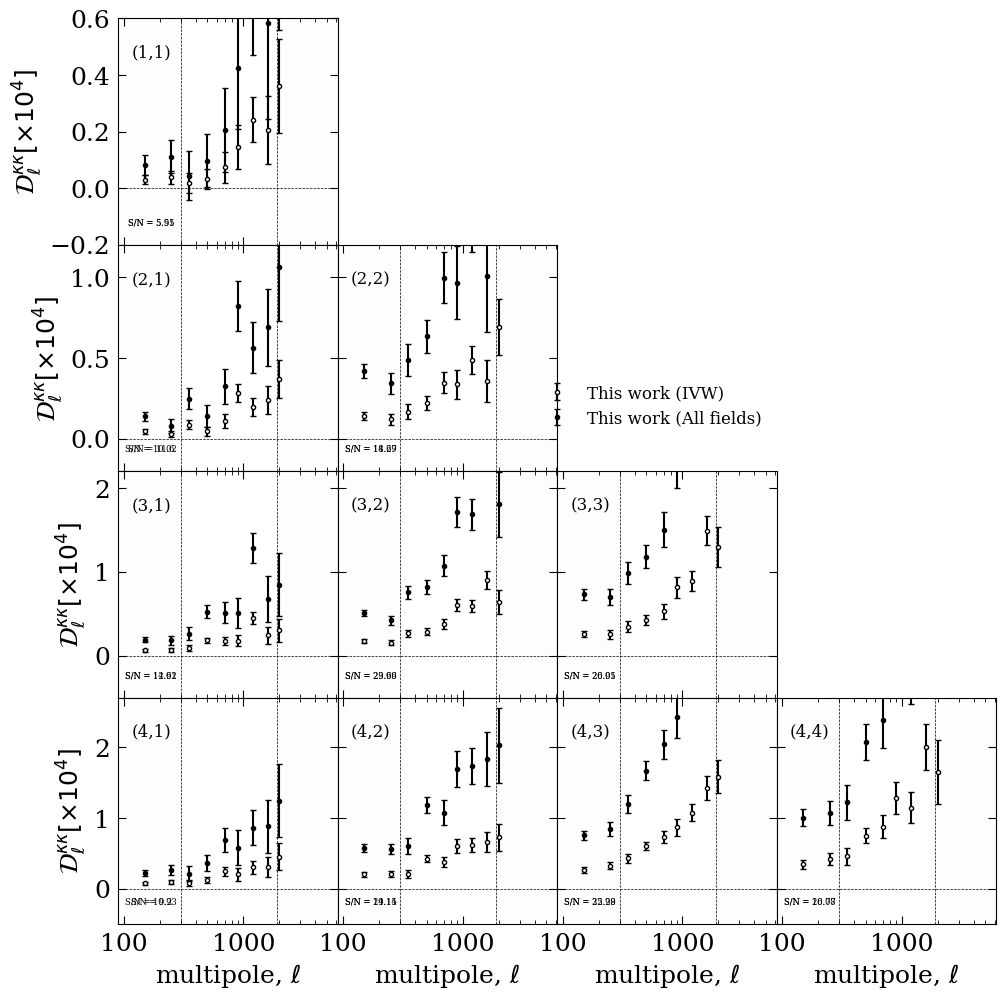

()

In [5]:
hmu.Shear2pt_plot(fname = [None],
                  labels = [None],
                  add_individual = False,
                  add_combined = 'ivw',
                  add_allfields=True,
                  add_literature=False,
                  add_Hikage_sacc=False,
                  theory_fname=None,
                  just_auto = False,
                  save_fig=False)

>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measur

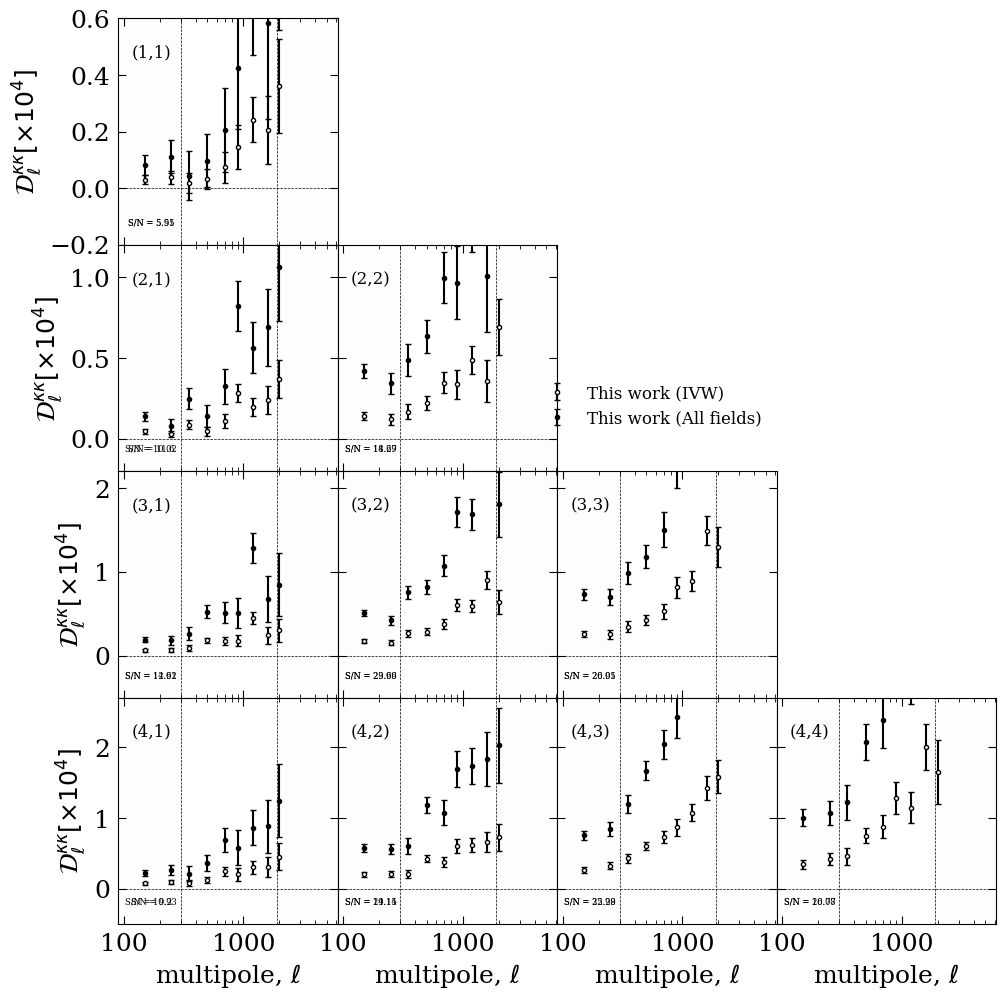

()

In [3]:
hmu.Shear2pt_plot(fname = [None],
                  labels = [None],
                  add_individual = False,
                  add_combined = 'ivw',
                  add_allfields=True,
                  add_literature=False,
                  add_Hikage_sacc=False,
                  theory_fname=None,
                  just_auto = False,
                  save_fig=False)

### Galaxy clustering

#### Clustering with S16A sample

In [5]:
path = '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/'
fname = [# GAMA09H
         os.path.join(path,'outputs_gama09h/summary_statistics_fourier.sacc'),
         # # GAMA15H
         os.path.join(path, 'outputs_gama15h/summary_statistics_fourier.sacc'),
         # # VVDS
         os.path.join(path, 'outputs_vvds/summary_statistics_fourier.sacc'),
         # # WIDE12H
         os.path.join(path, 'outputs_wide12h/summary_statistics_fourier.sacc'),
         # # XMM
         os.path.join(path, 'outputs_xmm/summary_statistics_fourier.sacc')
         ]
labels = ['GAMA09H','GAMA15H', 'VVDS','WIDE12H', 'XMM']

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding individual measurements
>> Plotting  GAMA09H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  GAMA15H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  VVDS
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  WIDE12H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  XMM
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens 

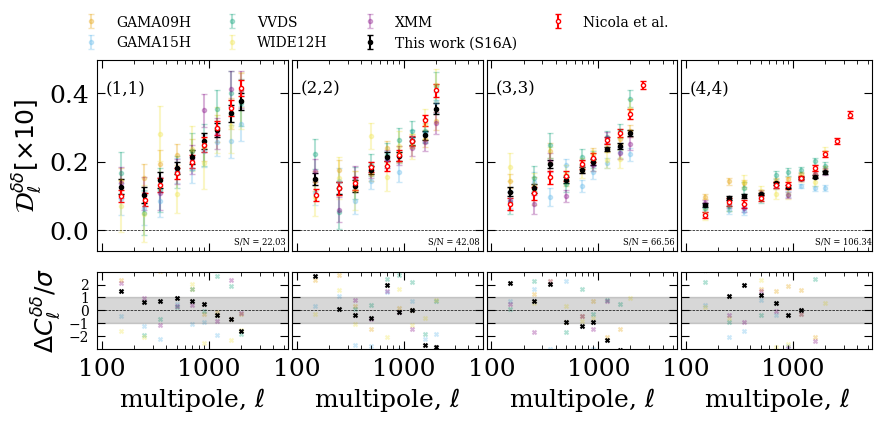

()

In [9]:
hmu.Clustering2pt_plot(fname = fname,
                       labels = labels,
                       add_individual=True,
                       add_combined='ivw_lens_s16a',
                       add_literature=True,
                       show_residual=True,
                       save_fig=True)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>> Adding combined measurement for S16A lens sample
>> Reading IVW combined measurements
>> Reading S16A lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering


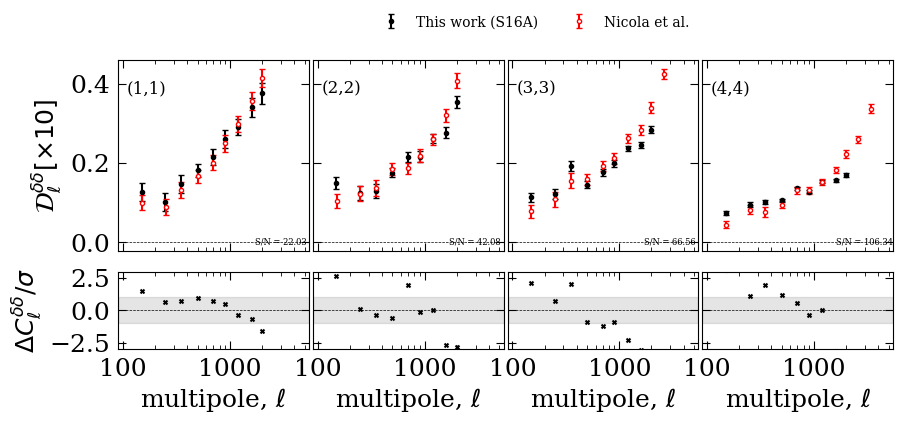

()

In [10]:
hmu.Clustering2pt_plot(fname = fname,
                       labels = labels,
                       add_individual=False,
                       add_combined='ivw_lens_s16a',
                       add_literature=True,
                       show_residual=True,
                       save_fig=True)

#### Clustering with DR1

In [2]:
path = '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/'
fname = [# GAMA09H
         # os.path.join(path,'outputs_gama09h/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path,'outputs_gama09h/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # GAMA15H
         # os.path.join(path, 'outputs_gama15h/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path, 'outputs_gama15h/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # VVDS
         # os.path.join(path, 'outputs_vvds/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path, 'outputs_vvds/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # WIDE12H
         # os.path.join(path, 'outputs_wide12h/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc'),
         os.path.join(path, 'outputs_wide12h/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc'),
         # # XMM
         # os.path.join(path, 'outputs_xmm/clustering_HSCPDR1_SNRimagmask_24102023/twopoint_data_fourier.sacc')
         os.path.join(path, 'outputs_xmm/clustering_HSCPDR1_SNRimagmask_24102023/summary_statistics_fourier.sacc')
         ]
labels = ['GAMA09H','GAMA15H', 'VVDS','WIDE12H', 'XMM']

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding individual measurements
>> Plotting  GAMA09H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  GAMA15H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  VVDS
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  WIDE12H
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Plotting  XMM
DV with covariance
Substracting noise
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens samp

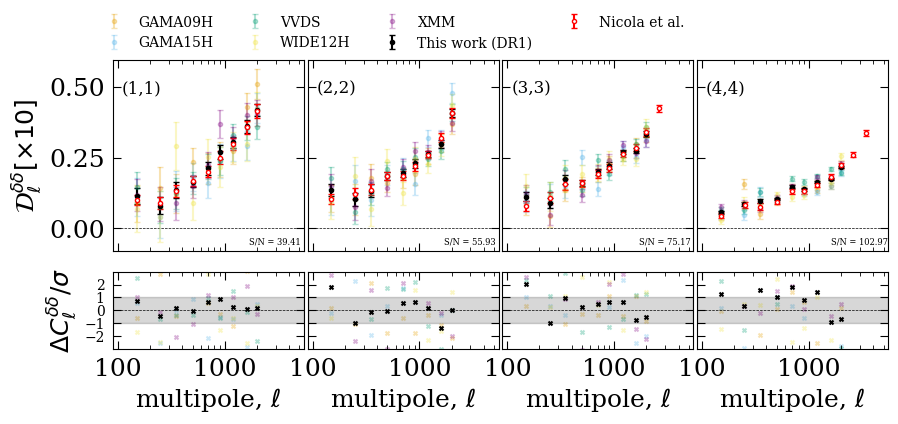

()

In [3]:
hmu.Clustering2pt_plot(fname = fname,
                        labels = labels,
                        add_individual=True,
                        add_combined='ivw_lens_dr1',
                        add_literature=True,
                        show_residual=True,
                        add_byhand = False,
                        save_fig=True)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Show residuals
>> Initializing figure ...
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>> Adding combined measurement for DR1 lens sample
>> Reading IVW combined measurements
>> Reading DR1 lens sample
>> Computing residuals
>>  Galaxy clustering - Nicola et al.
>> Saving figure ...
 Path:  /pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/figures/measurements/clustering


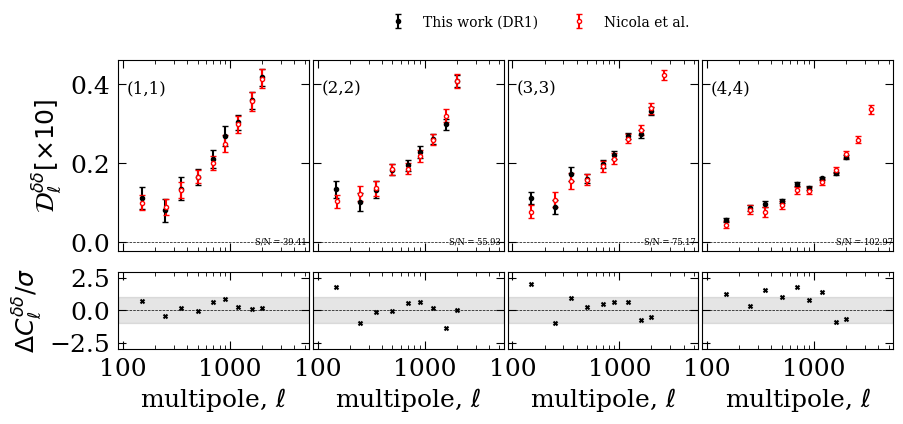

()

In [4]:
hmu.Clustering2pt_plot(fname = fname,
                        labels = labels,
                        add_individual=False,
                        add_combined='ivw_lens_dr1',
                        add_literature=True,
                        show_residual=True,
                        add_byhand = False,
                        save_fig=True)

##########################################
    Plotting Clustering 2pt functions    
##########################################
>> Number of lens bins:  4
>> Do not show residuals
>> Initializing figure ...
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Adding combined measurement for DR1 lens sample
>> Reading Inverse Variance Weighting combined measurements
>> Reading DR1 lens sample
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>> Reading ALL-FIELDS measurement
>>  Galaxy clustering - Nicola et al.


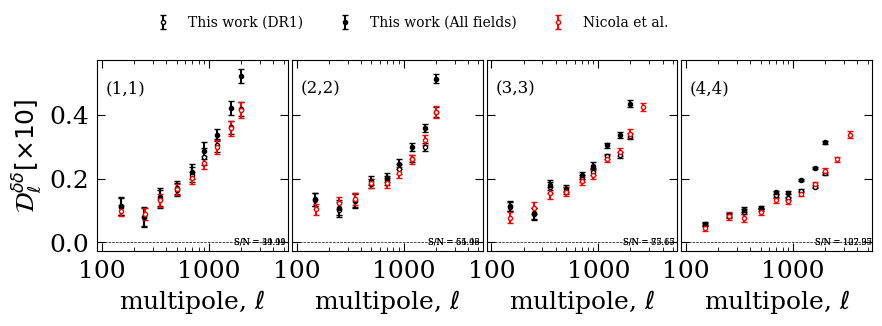

()

In [2]:
hmu.Clustering2pt_plot(fname = [None],
                        labels = [None],
                        add_individual=False,
                        add_allfields=True,
                        add_combined='ivw_lens_dr1',
                        add_literature=True,
                        show_residual=False,
                        add_byhand = False,
                        save_fig=False)

### Galaxy-galaxy lensing

In [2]:
fname = ['/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_gama09h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_gama15h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_vvds/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_wide12h/summary_statistics_fourier.sacc',
         '/pscratch/sd/d/davidsan/txpipe-reanalysis/hsc/outputs/outputs_xmm/summary_statistics_fourier.sacc']
labels = ['GAMA09H',
          'GAMA15H',
          'VVDS',
          'WIDE12H',
          'XMM']

In [ ]:
HSCMeasurementUtils.Gammat2pt_plot(fname = fname,
                                   labels = labels,
                                   add_individual = True,
                                   add_combined = 'ivw',
                                   theory_fname = None,
                                   save_fig=True)